## 뭉게뭉게 단어구름, Wordcloud


<img src="http://amueller.github.io/word_cloud/_images/sphx_glr_masked_001.png" width="200" align="right">

<img src="https://konlpy.org/en/latest/_static/konlpy.png" width="100" align="right">
<br>

### `wordcloud` 라이브러리와 `KoNLPy` 라이브러리

`wordcloud`는 파이썬의 텍스트 클라우드 라이브러리! 이를 기반으로 텍스트 구름을 그릴 수 있다.  
`konlpy`는 한국어 형태소 분석기 라이브러리로, 주어진 문장에서 명사 등을 뽑아 구름그리는 데 이용할 수 있다.  

자세한 wordcloud 설명은 https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
<br><br>
<span style="color:gray">⚠️ `konlpy`는 Java 베이스의 라이브러리이므로, Java가 설치되어있지 않다면 오류 발생할 수 있음! </span>
<br><br>

### Word Cloud를 만들기 위한 과정 ☁️
1. 자연어 문장에서 **키워드**를 추출 (한국어라면, `konlpy` 이용해 전처리!) 

    <span style="color: royalblue">e.g., "오늘 저녁메뉴 추천해주세요" --> #저녁메뉴 #추천</span>  
    
    
2. **키워드** 가 등장한 **빈도**를 측정 `Counter()` 

    <span style="color: royalblue">e.g., {"저녁메뉴":1, "추천": 1}</span>   
    
    
3. 전처리한 정보와 Wordcloud 라이브러리를 바탕으로 wordcloud 생성 `wordcloud`  

<img src="https://support.minitab.com/ko-kr/minitab/19/media/python/example_scriptoutput_wordcloud.png" width="150" align="left" >


<br><br><br><br><br><br>

------

### 0. `wordcloud`  & `KoNLPy` 라이브러리 설치

In [2]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 28.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.9/380.9 kB 12.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### 1. 라이브러리 불러오기

In [8]:
# 시각화
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 빈도수 측정
from collections import Counter

# 한글 문장에서 명사를 추출
from konlpy.tag import Hannanum

### 2. 자연어 전처리 (`KoNLPy` 이용) & 키워드 추출
'hannanum' 객체를 생성한 뒤, `.nouns()` 통해 명사 추출

In [4]:
K_anthem= """

동해 물과 백두산이 마르고 닳도록
하느님이 보우하사 우리나라 만세.
무궁화 삼천리 화려 강산
대한 사람, 대한으로 길이 보전하세.
남산 위에 저 소나무, 철갑을 두른 듯
바람 서리 불변함은 우리 기상일세.
무궁화 삼천리 화려 강산
대한 사람, 대한으로 길이 보전하세.
가을 하늘 공활한데 높고 구름 없이
밝은 달은 우리 가슴 일편단심일세.
무궁화 삼천리 화려 강산
대한 사람, 대한으로 길이 보전하세.
이 기상과 이 맘으로 충성을 다하여
괴로우나 즐거우나 나라 사랑하세.
무궁화 삼천리 화려 강산
대한 사람, 대한으로 길이 보전하세.
"""

In [10]:
han= Hannanum()
nouns= han.nouns(K_anthem)

nouns[:10]

['동해', '물', '백두산', '하느님', '보우하사', '우리나라', '만세', '무궁화', '삼천리', '화']

### 3. 단어의 갯수 계산 
`Counter( )`

In [11]:
counter= Counter(nouns)

counter

Counter({'동해': 1,
         '물': 1,
         '백두산': 1,
         '하느님': 1,
         '보우하사': 1,
         '우리나라': 1,
         '만세': 1,
         '무궁화': 4,
         '삼천리': 4,
         '화': 4,
         '강산': 4,
         '사람': 4,
         '대한': 4,
         '길': 4,
         '보전하세': 4,
         '남산': 1,
         '위': 1,
         '소나무': 1,
         '철갑': 1,
         '듯': 1,
         '불변': 1,
         '우리': 2,
         '기상일세': 1,
         '하늘': 1,
         '공활한데': 1,
         '구름': 1,
         '달': 1,
         '가슴': 1,
         '일편단심일세': 1,
         '기상': 1,
         '충성': 1,
         '사랑하세': 1})

### 4. Word Cloud 생성
` .generate_from_frequencies( )`: 빈도에 따른 구름 만들어라!

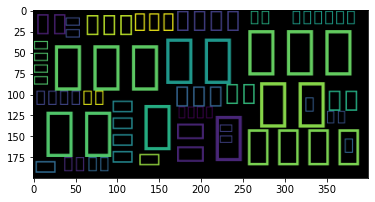

In [13]:
cloud= WordCloud()

img= cloud.generate_from_frequencies(counter)
plt.imshow(img)

한국말이라 인식이 되지 않았음..!  

한국어를 사용하기 위해서는 한국어 폰트를 인자로 넣어주어야함.

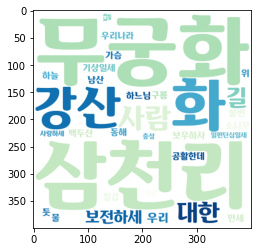

In [22]:
cloud= WordCloud(font_path="/Users/jiwookim/Downloads/BinggraeⅡ-Bold.otf",
                background_color="white", colormap="GnBu",
                width=400, height=400)

img= cloud.generate_from_frequencies(counter)
plt.imshow(img)

-----
### 5. 웹스크래핑 데이터로 워드 클라우드 만들기 

<span style="font-size:18px"> Target: 해시코드 질문 제목의 키워드 빈도로 워드클라우드 만들기! </span>  

해시코드에는 다양한 질문이 올라오는데, 질문 제목 아래에 "태그"가 있다.  

이 태그의 빈도를 측정하면 어떤 주제의 질문이 많이 올라오는지 알 수 있을 것 이다!

https://hashcode.co.kr  

#### 5-0-1. User-Agent 추가 

In [24]:
UA= {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36"}

#### 5-0-2. 스크래핑 & 텍스트 구름그림에 필요한 라이브러리 불러오기


In [33]:
import requests as req
from bs4 import BeautifulSoup

# 시각화
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 빈도수 측정
from collections import Counter

# 한글 문장에서 명사를 추출
from konlpy.tag import Hannanum

#### 5-1. 질문 제목 스크래핑

In [31]:
target= "https://hashcode.co.kr/"
res= req.get(target, UA)
soup= BeautifulSoup(res.text, "html.parser")


import time 

Qlist=[]
for i in range(1, 6): #5페이지ㄲㅏ지!
    res= req.get("https://hashcode.co.kr/?page={}".format(i), UA)
    soup= BeautifulSoup(res.text, "html.parser")
    
    questions = soup.find_all("li","question-list-item")


    for q in questions:
        Qlist.append(q.find("div","question").find("div","top").h4.text.strip())

    time.sleep(0.5)

In [32]:
Qlist[:10]

['파이썬 크롤링 관련하여 질문드립니다.',
 '자바 list의 sublist 사용해서 배열을 거꾸로 배치하는 코딩',
 '리스트 요소로 리스트 명을 출력하고 싶다.',
 '자바 클래스에서 private 선언 질문이요',
 "파이썬 '파일 생성' 오류 발생",
 'img 태그의 id를 이용해 표나 그리드에 사진을 넣을 수 있나요?',
 '파이썬 중간평가 calculator( numbers )',
 '마켓컬리 입사 연계 해커톤 참여자 모집합니다.',
 '[파이썬] 월별 마지막날 짜 구하기',
 'c# 중첩 class 질문!!!!!!!!!!!!!!!!']

#### 5-2. 명사 추출  
<br>
<span style="color: gray">
     
여기서 명사 추출은 리스트에 담긴 여러 문장들에게 해야 하기 때문에,  

문장 하나에 대한 추출을 여러번 진행해주어야 함.  

따라서 'nouns'라는 빈리스트 생성해 추출된 명사들을 담아줄 것인데,  

추출된 명사들은 list 형태로 반환되기 때문에 `.append` 이용하면 리스트 안에 리스트를 넣는 형식이 됨!  

이렇게: nouns= [[문장1의 단어들],[문장2의 단어들],...,[문장n의 단어들]]  

따라서 '+=' 이용해주어야함.
</span>

In [36]:
han = Hannanum()

nouns=[]
for q in Qlist:
    nouns += han.nouns(q)
    
print(nouns)

['파이썬', '크롤링', '관련하', '질문드', '자바', '사용해서', '배열', '배치', '코딩', '리스트', '요소', '리스트', '명', '출력', '자바', '클래스', '선언', '질문이요', '파이썬', '파', '생성', '오류', '발생', '태그', '이용', '그리드', '사진', '수', '파이썬', '중간평가', '마켓컬리', '입사', '연계', '해커톤', '참여자', '모집', '[파이썬]', '월별', '마지막날', 'c#', '중첩', '질문', '분류분석', '타겟값', '원핫인코딩', '질문', '파이썬', '셀레니움', '자식요소', '텍스트', '방법', '시', '것', '작동', '주사위', '말', '한번', '둘다', '그부분', '질문올려요', '크롤링', '태그', '속성', '값', '파이썬', '질문', '파이썬', '함수', '리스트', '튜플', '파이썬', '파', '생성관련', '오류', '질문', '분류값', '값', '추가하기', '코드', '변수', '결과', '값', '데', '어디', '날짜별', '시간대별', '카운트', '데이터프레', '관련', '함수', '실제', '데이터', '도형', '값', '광고', '삭제', '파이썬', '이터레이터', '질문', '씨언어', '문자열', '역순', '출력하기', '문자열', '실수', '오류관련', '질문', '광고', '삭제', '관련', '질문', '드', '로지스틱', '회귀분석', '질문드', '파이썬', '구조적', '프로그램', '객체지향', '프로그램', '만드는법', '프로젝트', '실행시', '콘솔창', '에러', '플러터', '질문', '특정', '폴더내', '이미지파', '불필요한', '이름', '뒤로가기한번하', '어플', '종료가되', '컴파일', '현상', '질문드', '파이썬', '문자열', '딕셔너리', '밸류', '값', '조건', '일괄', '변경', '질문드', '[파이썬]', '명', '팀원', '

#### 5-3. 단어들의 빈도 계산

In [37]:
counter= Counter(nouns)

#### 5-4. 구름 만들기

(-0.5, 1999.5, 1999.5, -0.5)

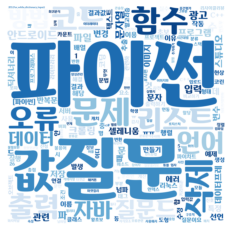

In [45]:
cloud= WordCloud(font_path="/Users/jiwookim/Downloads/BinggraeⅡ-Bold.otf",
                background_color="white", colormap="Blues",
                width=2000, height=2000)

img= cloud.generate_from_frequencies(counter)
plt.imshow(img,interpolation='bilinear')
plt.axis("off")

------
#### +. 구름에 모양내기 : Masked Word Cloud

(-0.5, 2819.5, 2519.5, -0.5)

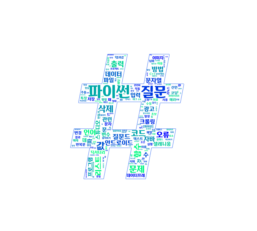

In [54]:

from PIL import Image
import numpy as np

# read the mask image
H_mask = np.array(Image.open("hashtag.png"))

# make cloud
cloud= WordCloud(font_path="/Users/jiwookim/Downloads/BinggraeⅡ-Bold.otf",
                mask= H_mask,
                background_color="white", colormap="winter",
                contour_color="#4177F6", contour_width= 2,
                width=2000, height=2000, scale=3)

img= cloud.generate_from_frequencies(counter)
plt.imshow(img,interpolation='bilinear')
plt.axis("off")